# Исследование данных авиакомпании

Российская авиакомпания F9 выполняет внутренние пассажирские перевозки. Нужно извлечь данные из базы с помощью SQL-запросов и проанализировать спрос на рейсы в города, где проходят крупнейшие культурные фестивали.

## Извлечение данных

Найдём количество рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. Назовём получившееся поле flights_amount:



---

```
SELECT
    aircrafts.model AS model,
    COUNT(flights.flight_id) AS flights_amount
FROM
    flights
    INNER JOIN aircrafts ON flights.aircraft_code = aircrafts.aircraft_code
WHERE
    DATE_TRUNC('MONTH', flights.departure_time) :: date = '2018-09-01'
GROUP BY
    model
```




---


```
MODEL	FLIGHTS_AMOUNT
Airbus A319-100	607
Airbus A321-200	960
Boeing 737-300	630
Boeing 767-300	600
Boeing 777-300	300
Bombardier CRJ-200	4446
Cessna 208 Caravan	4557
Sukhoi SuperJet-100	4185

```




Для удобства выведем отдельно: 

* Boeing,
* Airbus,
* другие (“other”):



---



```
SELECT
    CASE 
    WHEN aircrafts.model LIKE 'Boeing%' THEN 'Boeing'
    WHEN aircrafts.model LIKE 'Airbus%' THEN 'Airbus'
    ELSE 'other'
    END
    AS aircraft_model,
    COUNT(flights.flight_id) AS flights_amount
FROM
    flights
    INNER JOIN aircrafts ON flights.aircraft_code = aircrafts.aircraft_code
WHERE
    DATE_TRUNC('MONTH', flights.departure_time) :: date = '2018-09-01'
GROUP BY
    aircraft_model
```





---



```
AIRCRAFT_MODEL	FLIGHTS_AMOUNT
Airbus	1567
Boeing	1530
other	13188
```






Посчитаем среднее количество прибывающих рейсов в день для каждого города за сентябрь 2018 года. Назовём получившееся поле average_flights:



---



```
SELECT
    sub.city AS city,
    AVG(sub.flights_to_airport) AS average_flights
FROM (
    SELECT
        airports.city AS city,
        COUNT(flights.flight_id) AS flights_to_airport
    FROM
        flights
        INNER JOIN airports ON flights.arrival_airport = airports.airport_code
    WHERE
        DATE_TRUNC('DAY', flights.arrival_time) :: date BETWEEN '2018-09-01'
        AND '2018-09-30'
    GROUP BY
        airports.city,
        EXTRACT(DAY FROM flights.arrival_time)) as sub
GROUP BY
    sub.city
```





---



```
CITY	AVERAGE_FLIGHTS
Абакан	3.87097
Анадырь	1
Анапа	2.16129
Архангельск	5.35484
Астрахань	2.45161
Барнаул	2.6129
Белгород	6
Белоярский	2
Благовещенск	1
Братск	1
Брянск	10
Бугульма	3
Владивосток	3
Владикавказ	2
Волгоград	5.12903
Воркута	4.58065
Воронеж	2
Геленджик	2.59091
Горно-Алтайск	1.3871
Грозный	1.12903
Екатеринбург	11.3226
Иваново	1
Ижевск	1
Иркутск	6.03226
Йошкар-Ола	4.29032
Казань	7.74194
Калининград	2.58065
Калуга	2.03226
Кемерово	2
Киров	6
Когалым	3.16129
Комсомольск-на-Амуре	1
Краснодар	3.90323
Красноярск	11.5806
Курган	3.41935
Курск	2.29032
Кызыл	1.27778
Липецк	1.29412
Магадан	1.35714
Магнитогорск	4
Махачкала	3.29032
Минеральные Воды	3.41935
Мирный	6.29032
Москва	129.774
Мурманск	2
Надым	2.29032
Нальчик	3
Нарьян-Мар	2.6129
Нерюнгри	2.58065
Нефтеюганск	1
Нижневартовск	3.12903
Нижнекамск	3.74194
Нижний Новгород	5.87097
Новокузнецк	6.03226
Новосибирск	17.3226
Новый Уренгой	8.29032
Норильск	2.29032
Ноябрьск	3
Нягань	1
Омск	3.29032
Оренбург	5
Орск	1.59091
Пенза	4
Пермь	10.129
Петрозаводск	5.87097
Петропавловск-Камчатский	1
Псков	1.54839
Ростов-на-Дону	10.1935
Салехард	2
Самара	3
Санкт-Петербург	31.1613
Саранск	2
Саратов	4
Советский	9
Сочи	9.6129
Ставрополь	2
Стрежевой	1
Сургут	8.74194
Сыктывкар	4.12903
Тамбов	4
Томск	4.19355
Тюмень	6.96774
Удачный	3
Улан-Удэ	1.6087
Ульяновск	9.58065
Урай	2
Усинск	1
Усть-Илимск	2.87097
Усть-Кут	1
Уфа	6.29032
Ухта	3
Хабаровск	6.54839
Ханты-Мансийск	8.41935
Чебоксары	5
Челябинск	6.70968
Череповец	2.16129
Чита	1.58065
Элиста	4.87097
Южно-Сахалинск	4.29032
Якутск	2.74194
Ярославль	1.32258

```



Выведем фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили:



---



```
SELECT
    festival_name AS festival_name,
    EXTRACT(WEEK FROM festival_date) AS festival_week
FROM
    festivals
WHERE
    festival_city = 'Москва'
    AND DATE_TRUNC('DAY', festival_date) :: date BETWEEN 
    '2018-07-23' AND '2018-09-30'
```





---



```
FESTIVAL_NAME	FESTIVAL_WEEK
Park Live	30
Пикник Афиши	31
Видфест	36
```



Для каждой недели с 23 июля по 30 сентября 2018 года посчитаем количество билетов, которые купили на рейсы в Москву. Составим таблицу с номером недели, количеством купленных за неделю билетов, отметкой, проходил ли в эту неделю фестиваль, и названием фестиваля:



---



```
SELECT
    *
FROM
        (
        SELECT
            EXTRACT(WEEK FROM flights.arrival_time) as week_number,
            COUNT(ticket_flights.ticket_no) AS ticket_amount
        FROM
            ticket_flights
            INNER JOIN flights ON ticket_flights.flight_id = flights.flight_id
        WHERE
            flights.arrival_airport IN ('SVO', 'VKO', 'DME')
            AND DATE_TRUNC('DAY', flights.arrival_time) :: date BETWEEN 
                            '2018-07-23' AND '2018-09-30'
        GROUP BY
            week_number
        ORDER BY
            week_number) AS sub
        LEFT JOIN                    
        (
        SELECT
            EXTRACT(WEEK FROM festival_date) AS festival_week,
            festival_name AS festival_name
        FROM
            festivals
        WHERE
            festival_city = 'Москва'
        AND DATE_TRUNC('DAY', festival_date) :: date BETWEEN 
                        '2018-07-23' AND '2018-09-30') AS sub2
        ON sub.week_number = sub2.festival_week
```





---



```
WEEK_NUMBER	TICKET_AMOUNT	FESTIVAL_WEEK	FESTIVAL_NAME
30	43568	30	Park Live
31	51034	31	Пикник Афиши
32	51675	nan	
33	51378	nan	
34	51492	nan	
35	51360	nan	
36	51386	36	Видфест
37	51670	nan	
38	51518	nan	
39	51623	nan	
```



## Анализ данных

Результаты запросов сохранены в файлы.

query_1.csv:

* model — модель самолета;
* flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года.

query_3.csv:

* city — город;
* average_flights — среднее количество рейсов, прибывающих в город (city) за день в сентябре 2018 года.

Выберем топ-10 городов по количеству рейсов и построим графики: 
* модели самолётов и количество рейсов, 
* города и количество рейсов, 
* топ-10 городов и количество рейсов.

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# сохраним файл с моделями самолетов и количеством рейсов в сентябре 2018 года
aircrafts = pd.read_csv('/query_1.csv')
aircrafts

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [3]:
# проверим тип данных
aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


В таблице представлено 8 моделей самолетов (названия в текстовом формате) и количество рейсов в сентябре 2018 года, произведенных на каждой модели (в числовом формате int64).

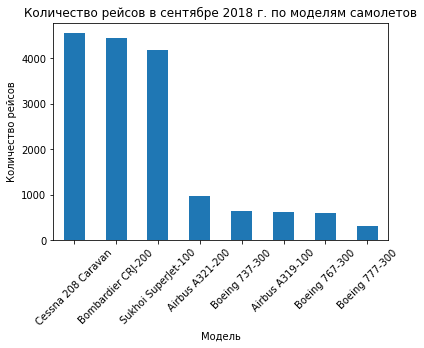

In [4]:
# визуализируем количество рейсов на разных моделях
aircrafts.sort_values(by = 'flights_amount', ascending = False).set_index('model')\
                                                                    .plot(kind = 'bar', legend = False)
plt.title('Количество рейсов в сентябре 2018 г. по моделям самолетов')
plt.xlabel('Модель')
plt.ylabel('Количество рейсов')
plt.xticks(rotation = 45);

Сравнивать количество рейсов на разных моделях в контексте нашей задачи не совсем корректно, поскольку их вместимость отличается в десятки раз.

Сравнивать количество рейсов на разных моделях в контексте нашей задачи не совсем корректно, поскольку их вместимость отличается в десятки раз.

**Cessna 208 Caravan** активно используется в региональных пассажирских перевозках, но вместимость этой модели - всего 9 пассажиров.
<a href = 'https://aviacenter.org/f/samolet_cessna_208b_grand_caravan_ex_dlya_mestnykh_i_regionalnykh_avialiniy_v_rossii_0.pdf'>Источник</a>

Вместимость **Bombardier CRJ200** - 50 человек. Эта модель используется, в частности, в чартерной и деловой авиации (например, авиакомпанией Руслайн).
<a href = 'https://yandex.ru/turbo/jetvip.ru/s/chastnie-samoleti/bombardier-crj-200/'>Источник</a>

Печально известный **Sukhoi Superjet 100** еще эксплуатировался в 2018 году, модель вмещала от 87 до 108 пассажиров.
<a href = 'https://ru.wikipedia.org/wiki/Sukhoi_Superjet_100'>Источник</a>

Вместимость **Airbus A319-100** - 124-156 человек, **Airbus A321-200** - от 170 до 220 человек, 

**Boeing 737-300** рассчитан на 150 пассажиров,

**Boeing 767-300** вмещает от 218 до 360 пассажиров,

**Boeing 777-300** - до 550 человек.

Как видим, количество рейсов на нашем графике обратно пропорционально вместимости: количество рейсов на моделях небольшой вместимости измеряется в тысячах, а рейсов на Boeing 777-300 было всего 300, но эта модель вмещает до 550 человек.

Возможно, в базе данных представлены не только регулярные пассажирские рейсы, но и чартерные или деловые авиаперелеты.

4500 рейсов на Cessna 208 Caravan перевезли не более 40 500 пассажиров. Это количество соответствует примерно 75 рейсам на Boeing 777-300 (при условии, что все билеты проданы). В то же время, большие самолеты не всегда заполняются полностью.

Логичнее оценивать количество билетов, проданных на рейсы, выполняющиеся на разных моделях.

In [5]:
# сохраним файл со средним количеством прибывающих рейсов по городам в сентябре 2018 года
cities = pd.read_csv('/query_3.csv')
cities

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [6]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


В таблице представлены данные по 101 городу. Названия городов - в текстовом виде (тип object), среднее количество прибывающих рейсов в день - в числовом формате (тип float64).

In [7]:
# посмотрим на распределение среднего количества рейсов по городам
cities.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Половина всех городов принимала в среднем не более 3 рейсов в день. Среднее (5.5) больше медианы (3), а стандартное отклонение довольно велико (более 13): значит, есть города, куда ежедневно прибывает сильно больше рейсов. Максимальное количество - почти 130 рейсов в день.

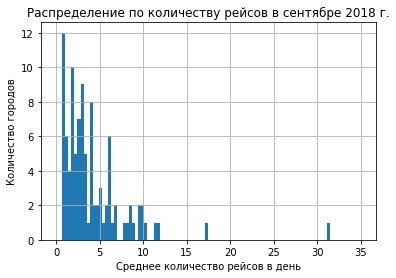

In [8]:
# визуализируем распределение по среднему количеству прибывающих рейсов
cities.hist(range = (0,35), bins = 100)
plt.title('Распределение по количеству рейсов в сентябре 2018 г.')
plt.xlabel('Среднее количество рейсов в день')
plt.ylabel('Количество городов');

In [9]:
# посмотрим на Топ-10 городов по среднему количеству прибывающих рейсов в сентябре 2018 г.
cities.sort_values(by = 'average_flights', ascending = False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Вполне ожидаемо, что с большим отрывом лидирует Москва, следом идет Санкт-Петербург и еще несколько крупных городов.

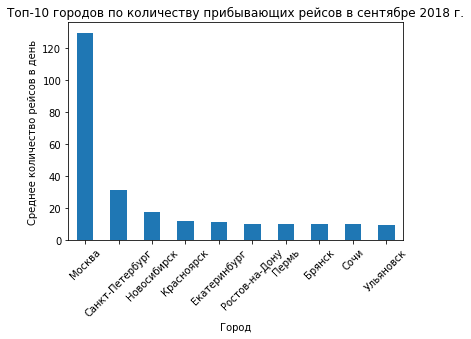

In [10]:
# визуализируем Топ-10 городов
cities.sort_values(by = 'average_flights', ascending = False).head(10).set_index('city')\
                                                                    .plot(kind = 'bar', legend = False)
plt.title('Топ-10 городов по количеству прибывающих рейсов в сентябре 2018 г.')
plt.xlabel('Город')
plt.ylabel('Среднее количество рейсов в день')
plt.xticks(rotation = 45);

Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь - города-миллионники, удаленные от Москвы и Санкт-Петербурга. Логично, что здесь большой пассажиропоток и люди часто предпочитают самолеты другим видам транспорта.

Сочи - приморский город, и высокий авиатрафик в сентябре может объясняться сезоном отпусков.

Попадание Ульяновска и Брянска в Топ-10 объяснить сложнее. Это может быть связано с какими-то мероприятиями, проходящими в это время, или с другими причинами.

## Выводы

Изучили и визуализировали данные за сентябрь 2018 г.:

* количество рейсов по моделям самолетов;
* среднее количество прибывающих рейсов по городам.

Выяснили, что:

* Наибольшее количество рейсов приходится на модели самолетов с небольшой вместимостью. В региональных авиаперевозках и деловой авиации активно используются модели, рассчитанные всего на несколько человек или несколько десятков пассажиров. На огромных самолетах, вмещающих сотни человек, выполняется гораздо меньше рейсов.

* В течение исследуемого периода большинство городов принимало в среднем не более 5-10 рейсов ежедневно. По количеству рейсов с большим отрывом лидировала Москва (почти 130 рейсов в день), следом идут Санкт-Петербург (31 рейс в день) и города-миллионники: Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь.